# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [66]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_name = []

units = 'imperial'

# Set counter
cityIndex = 1
counter = 1
  

for city in cities:
   
    try:
        qUrl = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
        response = requests.get(qUrl).json()
        city_name.append(response)
        
        print(f'Processing Record of set {cityIndex} | {city}')
        
    except:
        print('City not found. Skipping.....')
    pass

Processing Record of set 1 | tiksi
Processing Record of set 1 | churapcha
Processing Record of set 1 | new norfolk
Processing Record of set 1 | nsanje
Processing Record of set 1 | narsaq
Processing Record of set 1 | dikson
Processing Record of set 1 | grindavik
Processing Record of set 1 | ushuaia
Processing Record of set 1 | taoudenni
Processing Record of set 1 | vaini
Processing Record of set 1 | hobart
Processing Record of set 1 | arcata
Processing Record of set 1 | east london
Processing Record of set 1 | inhambane
Processing Record of set 1 | westport
Processing Record of set 1 | quimper
Processing Record of set 1 | rikitea
Processing Record of set 1 | deputatskiy
Processing Record of set 1 | port alfred
Processing Record of set 1 | mataura
Processing Record of set 1 | bredasdorp
Processing Record of set 1 | lavrentiya
Processing Record of set 1 | ribeira grande
Processing Record of set 1 | jamestown
Processing Record of set 1 | moree
Processing Record of set 1 | kodiak
Processing

Processing Record of set 1 | vallenar
Processing Record of set 1 | lubao
Processing Record of set 1 | kenai
Processing Record of set 1 | japura
Processing Record of set 1 | rio grande
Processing Record of set 1 | mattawa
Processing Record of set 1 | zatoka
Processing Record of set 1 | mogadishu
Processing Record of set 1 | klaksvik
Processing Record of set 1 | catamarca
Processing Record of set 1 | vardo
Processing Record of set 1 | grand river south east
Processing Record of set 1 | alofi
Processing Record of set 1 | leningradskiy
Processing Record of set 1 | touros
Processing Record of set 1 | avarua
Processing Record of set 1 | high rock
Processing Record of set 1 | bethel
Processing Record of set 1 | ilulissat
Processing Record of set 1 | mujiayingzi
Processing Record of set 1 | alexandria
Processing Record of set 1 | nanning
Processing Record of set 1 | carauari
Processing Record of set 1 | nuuk
Processing Record of set 1 | umzimvubu
Processing Record of set 1 | hualmay
Processing

Processing Record of set 1 | pierre
Processing Record of set 1 | streator
Processing Record of set 1 | hirara
Processing Record of set 1 | villa bruzual
Processing Record of set 1 | san patricio
Processing Record of set 1 | solnechnogorsk
Processing Record of set 1 | jumla
Processing Record of set 1 | san juan
Processing Record of set 1 | erzin
Processing Record of set 1 | haines junction
Processing Record of set 1 | kuytun
Processing Record of set 1 | tingi
Processing Record of set 1 | haicheng
Processing Record of set 1 | nakamura
Processing Record of set 1 | manta
Processing Record of set 1 | gorontalo
Processing Record of set 1 | mehamn
Processing Record of set 1 | tumannyy
Processing Record of set 1 | ekhabi
Processing Record of set 1 | louisbourg
Processing Record of set 1 | santa fe
Processing Record of set 1 | biltine
Processing Record of set 1 | sorong
Processing Record of set 1 | worthington
Processing Record of set 1 | karratha
Processing Record of set 1 | rodnykove
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:

city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxT = []
windS = []
numC = len(city_name)
for i in range(numC):
    try:
        city.append(city_name[i]["name"])
        cloudiness.append(city_name[i]["clouds"]["all"])
        country.append(city_name[i]["sys"]["country"])
        date.append(city_name[i]["dt"])
        humidity.append(city_name[i]["main"]["humidity"])
        lat.append(city_name[i]["coord"]["lat"])
        lng.append(city_name[i]["coord"]["lon"])
        maxT.append(city_name[i]["main"]["temp_max"])
        windS.append(city_name[i]["wind"]["speed"])
    except:
        continue
        
city_namedf = pd.DataFrame(list(zip(city, cloudiness, country,
                                    date, humidity, lat, lng,
                                    maxT, windS)),
                            columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

city_namedf


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tiksi,100,RU,1587664754,97,71.69,128.87,19.49,2.77
1,Churapcha,0,RU,1587664762,94,62.00,132.43,22.05,3.11
2,New Norfolk,79,AU,1587664983,72,-42.78,147.06,55.99,1.99
3,Nsanje,21,MW,1587664983,83,-16.92,35.26,70.77,5.37
4,Narsaq,20,GL,1587664758,43,60.92,-46.05,51.80,11.41
...,...,...,...,...,...,...,...,...,...
549,Burnie,55,AU,1587665076,84,-41.07,145.92,54.00,7.00
550,Charleston,75,US,1587664780,73,32.78,-79.93,75.20,10.29
551,Arica,75,CL,1587665017,60,-18.48,-70.30,71.60,9.17
552,Balkanabat,74,TM,1587665076,44,39.51,54.37,63.28,3.29


In [69]:
city_namedf.to_csv("city_namedf.csv", index = False, header = True)

# Plotting the Data
#Use proper labeling of the plots using plot titles #(including date of analysis) and axes labels.
#Save the plotted figures as .pngs.



In [70]:
from datetime import datetime
ts = int('1567634051')
converted = set([datetime.utcfromtimestamp(int(ts)).strftime('%m/%d/%Y') for ts in date])
weather_df = max(converted)

#### Latitude vs. Temperature Plot

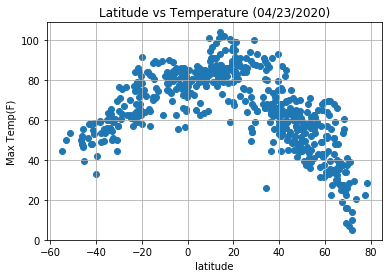

In [71]:
y_values= df['Max Temp']
x_values=df['Lat']
plt.scatter(x_values,y_values)
plt.title(f"Latitude vs Temperature ({weather_df})")
plt.ylabel('Max Temp(F)')
plt.xlabel('latitude')
plt.grid()
plt.savefig('Lat vs Temp.png')
plt.show()


#### Latitude vs. Humidity Plot

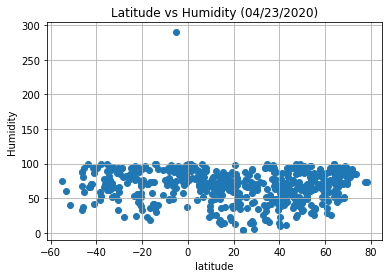

In [72]:
y_values = df['Humidity']
x_values = df['Lat']
plt.scatter(x_values,y_values)
plt.title(f"Latitude vs Humidity ({weather_df})")
plt.ylabel("Humidity")
plt.xlabel('latitude')
plt.grid()
plt.savefig('Lat vs Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

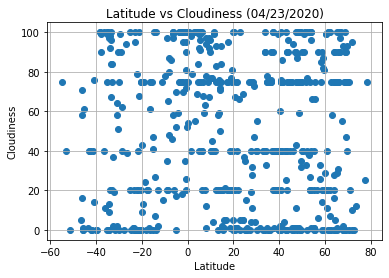

In [73]:
y_values = df['Cloudiness']
x_values = df['Lat']
plt.scatter(x_values,y_values)
plt.title(f"Latitude vs Cloudiness ({weather_df})")
plt.ylabel("Cloudiness")
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat vs Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

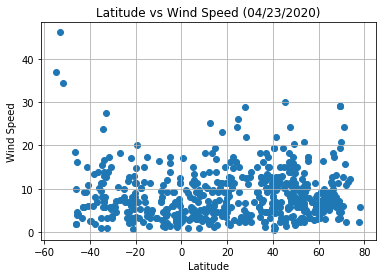

In [74]:
y_values = df['Wind Speed']
x_values = df['Lat']
plt.scatter(x_values,y_values)
plt.title(f"Latitude vs Wind Speed ({weather_df})")
plt.ylabel("Wind Speed")
plt.xlabel('Latitude')
plt.grid()
plt.savefig('Lat vs Wind Speed.png')
plt.show()

## Linear Regression

In [76]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = df.loc[df['Lat'] > 0, :] 
southern_hemisphere_df = df.loc[df['Lat'] < 0, :]





####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810829


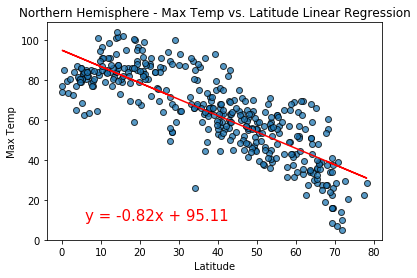

In [77]:
plt.scatter(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
#plt.savefig('lat_vs_windspeed.png')
x_values=northern_hemisphere_df['Lat']
y_values=northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('Northern Hemisphere-Max Temp_vs_Latitude.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7602633550516462


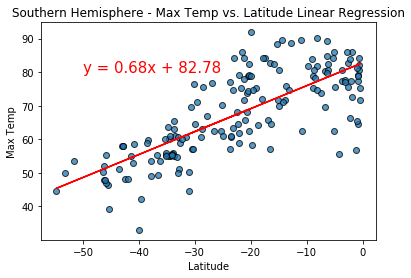

In [78]:
plt.scatter(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
#plt.savefig('lat_vs_windspeed.png')
x_values=southern_hemisphere_df['Lat']
y_values=southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('Southern Hemisphere-Max Temp_vs_Latitude.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746496


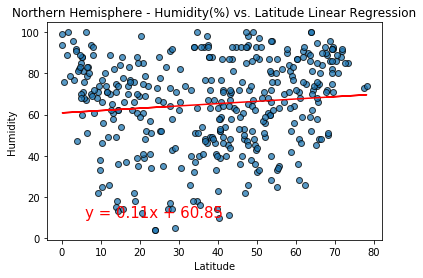

In [79]:
plt.scatter(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
x_values=northern_hemisphere_df['Lat']
y_values=northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583074


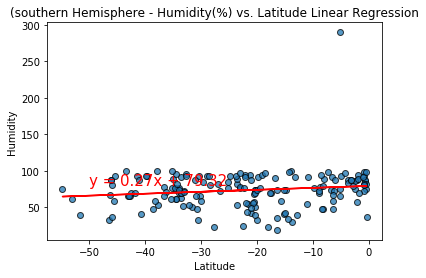

In [80]:
plt.scatter(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'], alpha=0.75, marker='o', edgecolors='black')
plt.title("(southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
x_values=southern_hemisphere_df['Lat']
y_values=southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


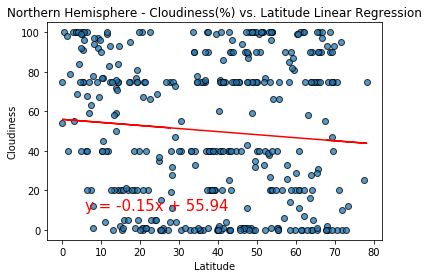

In [81]:
plt.scatter(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
x_values=northern_hemisphere_df['Lat']
y_values=northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991604


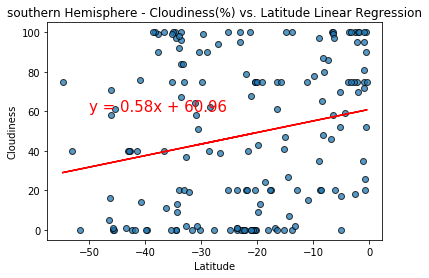

In [82]:
plt.scatter(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'], alpha=0.75, marker='o', edgecolors='black')
plt.title("southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
x_values=southern_hemisphere_df['Lat']
y_values=southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10713827743884798


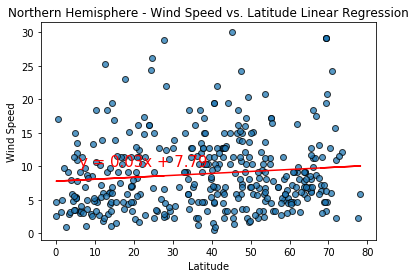

In [83]:
plt.scatter(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'], alpha=0.75, marker='o', edgecolors='black')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
x_values=northern_hemisphere_df['Lat']
y_values=northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('Northern Hemisphere - Wind Speed (%) vs. Latitude Linear Regression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3224830771395381


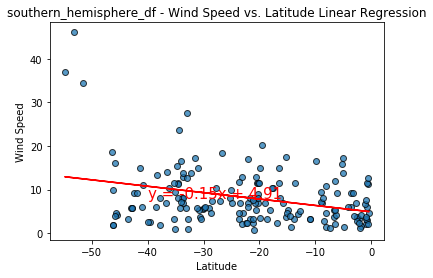

In [84]:
plt.scatter(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'], alpha=0.75, marker='o', edgecolors='black')
plt.title("southern_hemisphere_df - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
x_values=southern_hemisphere_df['Lat']
y_values=southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig('Southern Hemisphere - Wind Speed (%) vs.Latitude Linear Regression.png')
plt.show()